In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import importlib
import crypto_object

import tqdm

%matplotlib inline

In [2]:
crypto_object = importlib.reload(crypto_object)

AttributeError: 'module' object has no attribute 'reload'

In [3]:
btc = crypto_object.Coin('BTC', 'cryptocurrencypricehistory/bitcoin_price.csv')

In [4]:
btc.full_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Pct Returns
0,2018-02-20,11231.8,11958.5,11231.80,11403.7,"9,926,540,000","189,536,000,000",0.015893
1,2018-02-19,10552.6,11273.8,10513.20,11225.3,"7,652,090,000","178,055,000,000",0.063828
2,2018-02-18,11123.4,11349.8,10326.00,10551.8,"8,744,010,000","187,663,000,000",-0.050474
3,2018-02-17,10207.5,11139.5,10149.40,11112.7,"8,660,880,000","172,191,000,000",0.085871
4,2018-02-16,10135.7,10324.1,9824.82,10233.9,"7,296,160,000","170,960,000,000",0.006640


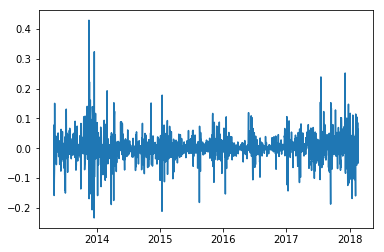

In [5]:
plt.plot(btc.full_data.loc[:,'Date'], btc.full_data.loc[:,'Pct Returns'])

In [6]:
(btc.full_data.loc[2,'Date'] - btc.full_data.loc[3,'Date']).days

1

In [7]:
import datetime

In [8]:
btc.full_data['Date'][btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")]

1   2018-02-19
Name: Date, dtype: datetime64[ns]

In [9]:
np.argwhere(btc.full_data['Date'] == datetime.datetime.strptime('2018-02-19', "%Y-%m-%d"))[0][0]

1

In [10]:
datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")

datetime.datetime(2018, 2, 19, 0, 0)

In [11]:
np.random.choice(btc.full_data['Pct Returns'])

0.037955849755564326

In [12]:
import option_pricing as op

In [13]:
op = importlib.reload(op)

AttributeError: 'module' object has no attribute 'reload'

In [15]:
d1 = datetime.datetime.strptime('2016-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
out = op.random_paths(btc, d1, d2, lookback=60, N=50)

In [16]:
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
btc.full_data['Close'][(idx2):idx1].sort_index(ascending=False)

731     437.16
730     438.80
729     437.75
728     420.74
727     424.95
726     424.54
725     432.15
724     432.52
723     433.50
722     437.70
721     435.12
720     423.99
719     421.65
718     410.94
717     400.57
716     407.71
715     414.32
714     413.97
713     414.86
712     417.13
711     421.69
710     411.62
709     414.06
708     416.44
707     416.83
706     417.01
705     420.62
704     409.55
703     410.44
702     413.75
        ...   
395     921.79
394     924.67
393     921.01
392     892.69
391     901.54
390     917.59
389     919.75
388     921.59
387     919.50
386     920.38
385     970.40
384     989.02
383    1011.80
382    1029.91
381    1042.90
380    1027.34
379    1038.15
378    1061.35
377    1063.07
376     994.38
375     988.67
374    1004.45
373     999.18
372     990.64
371    1004.55
370    1007.48
369    1027.44
368    1046.21
367    1054.42
366    1047.87
Name: Close, Length: 366, dtype: float64

In [17]:
idx2

366

In [18]:
def plot_random_paths(rp, true_path, coin):
    
    f, ax = plt.subplots(1,1, figsize=(12,8))
    
    dates = rp.index
    
    rp = rp.sort_index(axis=0 ,ascending=False).values
    true_path = true_path.sort_index(ascending=False).values
    
    N = rp.shape[1]
    
    for i in np.arange(N):
        ax.plot(dates, rp[:, i], color='blue', alpha=.2)
        
    ax.plot(dates, true_path, color='red')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('{} Price'.format(coin.name))
    ax.set_title(coin.name)

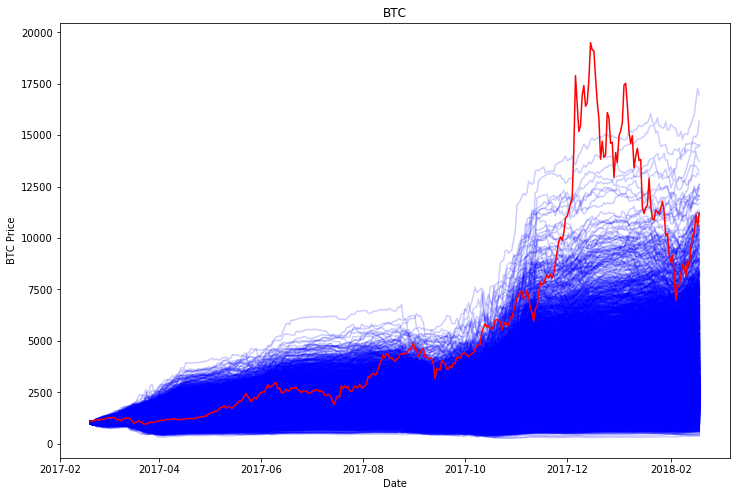

In [34]:
d1 = datetime.datetime.strptime('2017-02-19', "%Y-%m-%d")
d2 = datetime.datetime.strptime('2018-02-19', "%Y-%m-%d")
idx1 = np.argwhere(btc.full_data['Date'] == d1)[0][0]
idx2 = np.argwhere(btc.full_data['Date'] == d2)[0][0]
out = op.random_paths(btc, d1, d2, lookback=15, N=10000)
plot_random_paths(out, btc.full_data['Close'][idx2:idx1].reset_index()['Close'], btc)

In [40]:
out.iloc[-1, :]

0       1050.926353
1       1061.086525
2       1061.086525
3       1062.583591
4       1064.594882
5       1056.093027
6       1066.625610
7       1050.926353
8       1062.583591
9       1041.360688
10      1067.013230
11      1061.086525
12      1062.583591
13      1062.583591
14      1067.013230
15      1049.568155
16      1068.630199
17      1050.926353
18      1038.913846
19      1068.630199
20      1071.287217
21      1041.360688
22      1042.372190
23      1041.360688
24      1042.372190
25      1038.913846
26      1062.583591
27      1056.093027
28      1042.372190
29      1061.086525
           ...     
9970    1056.093027
9971    1068.630199
9972     980.162144
9973    1041.360688
9974    1071.287217
9975    1041.360688
9976    1042.372190
9977    1032.235848
9978    1049.568155
9979    1049.568155
9980    1041.360688
9981    1071.287217
9982    1056.093027
9983    1032.235848
9984    1068.630199
9985    1068.630199
9986    1056.093027
9987    1038.913846
9988     980.162144


In [41]:
np.nanmax([np.nanmean(out.iloc[-1, :]), 0])

1050.359887655939

In [46]:
op = reload(op)

In [47]:
op.empirical_method(btc, d1, d2, 0, 5000, 'call', lookback=30, N=500)

137.11157320639776

In [ ]:
#####
# Options Strip
######

In [61]:
def get_options_strip(coin, current_date, r, N_iter):
    
    # near and far dates
    near_term = current_date + datetime.timedelta(days=5)
    next_term = current_date + datetime.timedelta(days=30)
    
    starting_index = np.argwhere(coin.full_data['Date'] == current_date)[0][0]
    starting_price = coin.full_data['Close'][starting_index]
    
    # produces ks to search over
    ks_near = np.linspace(starting_price * .9, starting_price * 1.1, 10)
    ks_next = np.linspace(starting_price * .8, starting_price * 1.2, 20)
    
    # near term options
    near_term_calls = np.empty((10, ))
    near_term_puts = np.empty((10, ))
    
    # next term options
    next_term_calls = np.empty((20, ))
    next_term_puts = np.empty((20, ))
    
    for i, k in enumerate(ks_near):
        near_term_calls[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=5, N=N_iter)
        near_term_puts[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=5, N=N_iter)
        
    for i, k in enumerate(ks_next):
        next_term_calls[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'call', lookback=30, N=N_iter)
        next_term_puts[i] = op.empirical_method(coin, current_date, near_term, 0, k, 'put', lookback=30, N=N_iter)
        
    near_term_df = pd.DataFrame([near_term_calls, near_term_puts]).T
    near_term_df.columns = ['Calls', 'Puts']
    near_term_df.index = ks_near
    next_term_df = pd.DataFrame([next_term_calls, next_term_puts]).T
    next_term_df.columns = ['Calls', 'Puts']
    next_term_df.index = ks_next
    
    return (near_term_df, next_term_df)

In [64]:
a = get_options_strip(btc, d1, 0, 100)[0]

In [68]:
a.loc[a.mean(axis=1).idxmin()]

1059.5129999999999

In [97]:
a.loc[a.mean(axis=1).idxmin()]

Calls    19.635470
Puts     11.381509
Name: 1059.513, dtype: float64

In [58]:
pd.DataFrame([np.ones(5), np.ones(5)]).T

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [132]:
cls = a['Calls'].index.values

In [133]:
cls

array([  943.083,   966.369,   989.655,  1012.941,  1036.227,  1059.513,
        1082.799,  1106.085,  1129.371,  1152.657])

In [134]:
cls[(1059.5129999999999 - cls).argmin()]

1152.6569999999999

In [141]:
cls = 1059.5129999999999 - cls

In [143]:
cls[cls > 0].argmin()

4

In [240]:
from __future__ import division

def closest_call_or_put(val, array, call_or_put):
    
    try:
        # loop through array and return propery idx
        if call_or_put == 'call':
            return min(array[array - val > 0])
        else:
            return max(array[val - array > 0])
    except:
        return val
        
        

def cryptoVix(coin, current_date, r, N_iter, N_paths):
    
    vix = np.empty((N_iter,))
    for i in np.arange(N_iter):
    
        # near and next options strip
        near_strip, next_strip = get_options_strip(coin, current_date, r, N_paths)

        # get idx where calls and puts differ the least
        near_closest_idx = near_strip.mean(axis=1).idxmin()
        next_closest_idx = next_strip.mean(axis=1).idxmin()

        T_1 = 5/365
        T_2 = 30/365

        # near and next forward prices
        F_near = near_closest_idx + (np.exp(r * T_1) * \
                    (near_strip.loc[near_closest_idx, 'Calls'] - \
                     near_strip.loc[near_closest_idx, 'Puts']))

        F_next = next_closest_idx + (np.exp(r * T_2) * \
                    (next_strip.loc[next_closest_idx, 'Calls'] - \
                     next_strip.loc[next_closest_idx, 'Puts']))

        # near/next strikes to find K_0s
        ks_near = near_strip.index.values
        ks_next = next_strip.index.values
        
        

        k_0_near_call = closest_call_or_put(near_closest_idx, ks_near, 'call')
        k_0_near_put = closest_call_or_put(near_closest_idx, ks_near, 'put')

        k_0_next_call = closest_call_or_put(next_closest_idx, ks_next, 'call')
        k_0_next_put = closest_call_or_put(next_closest_idx, ks_next, 'put')

        # strikes given by np.linspace so the delta for strikes is constant
        # therefore sufficient to calc one delta
        delta_near = np.abs((ks_near[1] - ks_near[0]) / 2)
        delta_next = np.abs((ks_next[1] - ks_next[0]) / 2)

        # near and next strikes for calls and puts to be calculated
        ks_near_puts = ks_near[ks_near < k_0_near_put]
        ks_near_calls = ks_near[ks_near > k_0_near_call]
        ks_next_puts = ks_next[ks_next < k_0_next_put]
        ks_next_calls = ks_next[ks_next > k_0_next_call]

        # calculate near vol
        near_sum = 0
        for k in ks_near_puts:
            near_sum = near_sum + near_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_near_calls:
            near_sum = near_sum + near_strip.loc[k, 'Calls'] / (k**2)

        sigma_2_near = (np.exp(r * T_1) * delta_near * (2 / T_1) * near_sum) - \
            ((1 / T_1) * (((F_near / np.nanmean([k_0_near_call, k_0_near_put])) - 1)**2))

        # calculate next vol
        next_sum = 0
        for k in ks_next_puts:
            next_sum += next_strip.loc[k, 'Puts'] / (k**2)
        for k in ks_next_calls:
            next_sum += next_strip.loc[k, 'Calls'] / (k**2)


        sigma_2_next = (np.exp(r * T_2) * delta_next * (2 / T_2) * next_sum) - \
            ((1 / T_2) * (((F_next / np.nanmean([k_0_next_call, k_0_next_put])) - 1)**2))

        vix[i] = 100 * np.sqrt((T_1 * sigma_2_near) + (T_2 * sigma_2_next) * (365/30))
        
    return(np.nanmean(vix))

In [204]:
cryptoVix(btc, d1, 0, 20, 200)

100%|██████████| 20/20 [03:10<00:00,  9.44s/it]


5.9078101556798641

# VIX

Methodology:

* Create options strip 5 days in future and 30 days in future.
* Find forward price: strike at which call and put differs by the least amount.



In [243]:
def coin_vix(coin):
    # create vix for a given coin
    
    # for replicability
    np.random.seed(109)
    dates = coin.full_data['Date'][:-31]
    vix = np.empty((len(dates,)))
    
    # create vix for each date
    for i in tqdm.trange(len(dates,)):
        
        vix[i] = cryptoVix(coin, dates[i], 0, 4, 100)

    out_series = pd.Series(vix)
    out_series.index = dates
    return out_series

In [ ]:
qtum_vix = coin_vix(coins['qtum'])



  0%|          | 0/242 [00:00<?, ?it/s]


  0%|          | 1/242 [00:19<1:17:34, 19.31s/it]

  1%|          | 2/242 [00:38<1:16:33, 19.14s/it]

  1%|          | 3/242 [00:58<1:17:13, 19.39s/it]

  2%|▏         | 4/242 [01:17<1:16:32, 19.30s/it]

  2%|▏         | 5/242 [01:35<1:15:31, 19.12s/it]

  2%|▏         | 6/242 [01:54<1:14:13, 18.87s/it]

  3%|▎         | 7/242 [02:13<1:14:15, 18.96s/it]

  3%|▎         | 8/242 [02:32<1:14:39, 19.14s/it]

  4%|▎         | 9/242 [02:52<1:14:55, 19.29s/it]

In [70]:
import crypto_backtester as cb
coins = cb.load_coins('cryptocurrencypricehistory/')